In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from scipy.stats import norm


In [2]:
data = pd.read_excel("Schulnoten.xlsx")
data.head()

,stunden,bestande
0,39,0
1,27,0
2,93,1
3,44,1
4,53,1


In [3]:
x = data["stunden"].values.reshape(-1,1)
y = data["bestande"].values


In [4]:
train, test = train_test_split(data, test_size = 0.2)

x_train = train["stunden"].values.reshape(-1,1)
y_train = train["bestande"].values

x_test = test["stunden"].values.reshape(-1,1)
y_test = test["bestande"].values

In [5]:
model = LogisticRegression().fit(x_train, y_train)

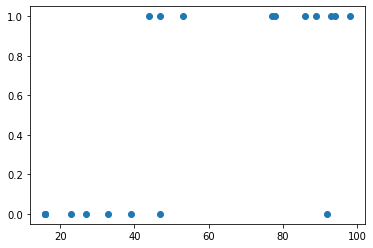

In [6]:
plt.scatter(x,y)
plt.show()

In [7]:
y_predict_test = model.predict(x_test)
conf = metrics.confusion_matrix(y_test, y_predict_test)
print(conf)

re = model.score(x_test, y_test)
print(re)

score = (conf[0][0] + conf[1][1]) / np.sum(conf)
print(score)

[[2 0]
 [0 2]]
1.0
1.0


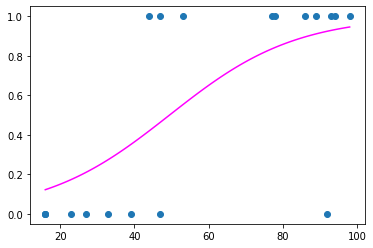

In [8]:
x_values = np.linspace(min(x), max(x), 100).reshape(-1,1)
y_values = model.predict_proba(x_values)[:,1]

plt.scatter(x,y)
plt.plot(x_values, y_values, c = "fuchsia")
plt.show()